Import packages and instantiate constructors

In [1]:
import load_data as ld
import commomentum as cm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
ld = ld.LoadData()
# ld.show_available_commodities() --> optional

Load all commodities available

In [3]:

# commos = ['Oat Futures', 'Crude Oil', 'Gold'] --> optional to select a subset of commodities 
df = ld.load_data_from_yf(load_all=True, return_period='monthly')
df = ld.remove_outliers(df) # naive method: replace any monthly returns above 250%, by the 6 month average

Fetching data from 2010-02-04 to 2025-02-04


[*********************100%%**********************]  1 of 1 completed
c:\Users\urkes\commodity_strategy\load_data.py:90: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  returns = data['Adj Close'].resample('M').last().pct_change()
[*********************100%%**********************]  1 of 1 completed
c:\Users\urkes\commodity_strategy\load_data.py:90: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  returns = data['Adj Close'].resample('M').last().pct_change()
[*********************100%%**********************]  1 of 1 completed
c:\Users\urkes\commodity_strategy\load_data.py:90: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  returns = data['Adj Close'].resample('M').last().pct_change()
[*********************100%%**********************]  1 of 1 completed
c:\Users\urkes\commodity_strategy\load_data.py:90: FutureWarning: 'M' is deprecate

Combined data saved to ./data\combined_commodities.csv



c:\Users\urkes\commodity_strategy\load_data.py:90: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  returns = data['Adj Close'].resample('M').last().pct_change()


Run strategies

In [4]:
momentum = cm.CommodityMomentum(df)
yearly_mom = momentum.commodity_momentum_strategy(K=4, X=12, RiskFreeRate=0.03)
# call yearly_mom to view the dataframe

Sharpe Ratio: 1.61
Max Drawdown: -0.08
Average Yearly Return: 0.12
Yearly Standard Deviation: 0.05


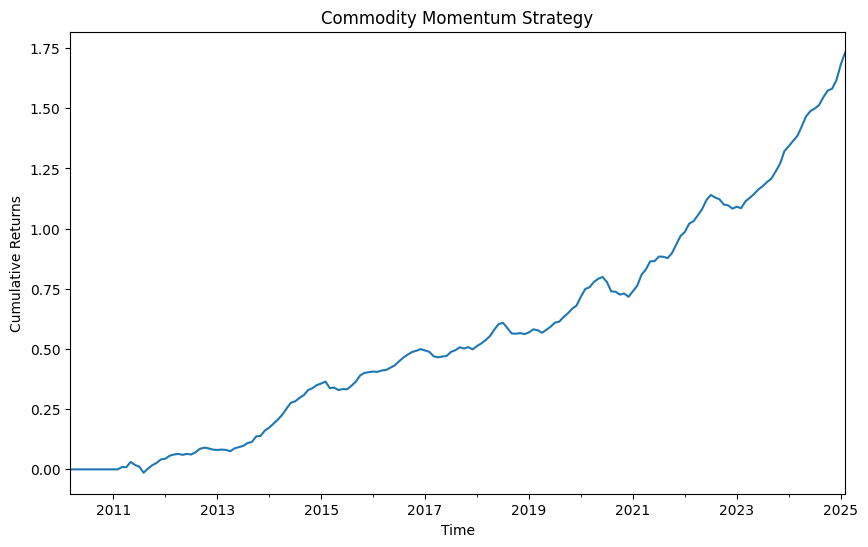

In [5]:
momentum.plot_strategy_returns(yearly_mom)

Test all momentum periods

In [20]:
# we will compare the momentum performance across different time dimensions 
strategies = momentum.compare_momentum_periods(range=[1, 2, 3, 4, 6, 9, 12, 15, 18, 21, 24], RiskFreeRate=0.03) # leave K as 4 (default)

In [21]:
strategies

,Annualized_Return,Annualized_StdDev,Sharpe_Ratio,Cumulative_Return
1,0.293067,0.048787,5.392134,74.666515
2,0.261895,0.049432,4.691211,46.880688
3,0.227794,0.050372,3.926687,27.982334
4,0.253548,0.048979,4.564127,41.370617
6,0.224790,0.047290,4.119057,26.788234
9,0.143209,0.051706,2.189478,7.297413
12,0.115375,0.053008,1.610612,4.484049
15,0.095965,0.051730,1.275181,3.113047
18,0.077049,0.051489,0.913760,2.103873
21,0.050438,0.052079,0.392440,1.085544


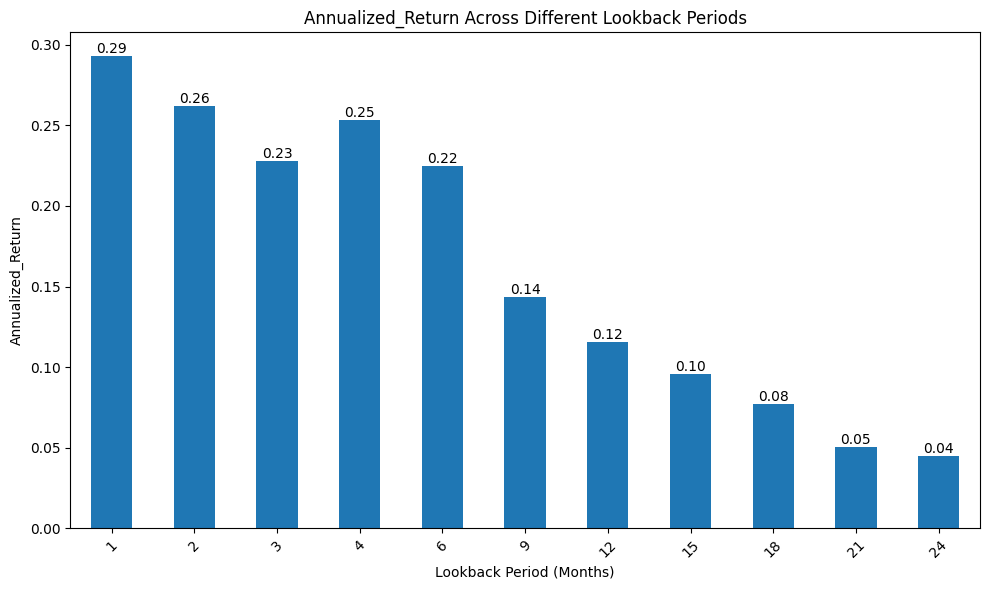

In [22]:
momentum.histogram_momentum_strategies(strategies, metric='Annualized_Return')

Best performance seems to be attained by pursuing shorter momentum periods. The trading costs have not been accounted for in this strategy, and I believe that those will significantly affect the strategy in a negative way. 
